In [ ]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from datetime import datetime
from pprint import pprint

#Crimes_2012-2015
#https://catalog.data.gov/dataset/crimes-2012-2015

# 935259 Rows
# 2012 - 2015
#Header = Date.Rptd, DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,
#            LOCATION,Cross.Street,Location.1
#AREA.NAME = districten


years =[]

#import dataset (pas locatie aan)
#filter header eruit
crime_data = (sc.textFile('../Crimes_2012-2015.csv').filter(lambda line: 'DATE.OCC' not in line))


for i in range(12, 16, 1):
    y = '20' + str(i)
    year = crime_data.filter(lambda line: '/' + y in line)
    years.append(year)
    print year.take(1)
    
    print years[i-12].count()

for i in range(12,16, 1):
    print years[i].count()




[u'12/31/2012,120418722,12/31/2012,800,4,Hollenbeck,453,510,VEHICLE - STOLEN,IC,Invest Cont, 1400    WARREN                       ST,,"(34.0515, -118.2201)"']
238117
[u'03/20/2013,132007717,03/20/2013,2015,20,Olympic,2004,997,TRAFFIC DR #,UNK,Unknown,              OXFORD,   OAKWOOD,"(34.0776, -118.308)"']
239731
[u'08/23/2014,140119745,08/23/2014,2240,1,Central,111,310,BURGLARY,IC,Invest Cont,  500      N  FIGUEROA                     ST,,"(34.0617, -118.2469)"']


228443
228443
228443
228443


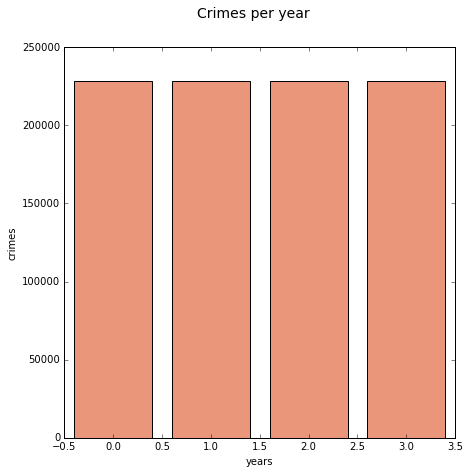

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

# x_axis = [ for i in range(12, 16, 1)]

x_axis = []
y_axis = []

for i in range(0, 4):
#     try:
#     y = i-12
    x_axis.append(i)
    y_axis.append(years[i].count())
    print years[i].count()
        
#     except:
#         y_axis.append(0)
#         print 'test'
       


fig = plt.figure(figsize=(7, 7))
fig.suptitle('Crimes per year', fontsize=14)
ax = fig.add_subplot(111)
ax.set_xlabel('years')
ax.set_ylabel('crimes')
ax.bar(x_axis, y_axis, fc='darksalmon', align='center')
plt.show()

In [10]:
sqlContext = SQLContext(sc)

AttributeError: 'SQLContext' object has no attribute 'show'

In [3]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from datetime import datetime

#Crimes_2012-2015
#https://catalog.data.gov/dataset/crimes-2012-2015

# 935259 Rows
# 2012 - 2015
#Header = Date.Rptd, DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,
#            LOCATION,Cross.Street,Location.1
#AREA.NAME = districten

YEARS = [2012, 2013, 2014, 2015]
crime_data = []

#import dataset (pas locatie aan)
#filter header eruit
# crime_data = (sc.textFile('../data/crimesLA/Crimes_2012-2015.csv').filter(lambda l: 'DATE.OCC' not in l))

# convert to a dataframe
def convert_to_df(year):
#     if year == '2015-01':
#         separator = '\t'
#     else:
#         separator = ';'
    seperator = ";"
    crime_data = sc.textFile('../Crimes_2012-2015.csv')
    year_rdd = (crime_data
                    .filter(lambda l: 'DATE.OCC' not in l)
                    .filter(lambda l: '/' + year in l)
                    .map(lambda l: add_fields(l, separator))
               )
    
    # apply the schema to the RDD.
    year_df = sqlContext.createDataFrame(year_rdd, schema)
    
    return year_df

fields = []
fields.append(StructField('DateReported', DateType(), True))
fields.append(StructField('Docnr', IntegerType(), True))
fields.append(StructField('DateOccupied', DateType(), True))
fields.append(StructField('areaId', IntegerType(), True))
fields.append(StructField('areaName', StringType(), True))
fields.append(StructField('rd', IntegerType(), True))
fields.append(StructField('crimeId', IntegerType(), True))
fields.append(StructField('crimeName', StringType(), True))
fields.append(StructField('statusId', IntegerType(), True))
fields.append(StructField('statusName', StringType(), True))
fields.append(StructField('location', StringType(), True))
fields.append(StructField('crossStreet', StringType(), True))
fields.append(StructField('location_type', StringType(), True))
schema = StructType(fields)


        

fields = []
fields.append(StructField('DateReported', DateType(), True))
fields.append(StructField('Docnr', IntegerType(), True))
fields.append(StructField('DateOccupied', DateType(), True))
fields.append(StructField('areaId', IntegerType(), True))
fields.append(StructField('areaName', StringType(), True))
fields.append(StructField('rd', IntegerType(), True))
fields.append(StructField('crimeId', IntegerType(), True))
fields.append(StructField('crimeName', StringType(), True))
fields.append(StructField('statusId', IntegerType(), True))
fields.append(StructField('statusName', StringType(), True))
fields.append(StructField('location', StringType(), True))
fields.append(StructField('crossStreet', StringType(), True))
fields.append(StructField('lat', FloatType(), True))
fields.append(StructField('long', FloatType(), True))
schema = StructType(fields)




def add_fields(line, separator):
    fields = []
    vals = line.split(separator)
    # DateReported
    date = datetime.strptime(vals[0], '%m/%d/%Y')
    fields.append(date)
    # Docnr
    fields.append(int(vals[2]))
    # DateOccupied
    date = datetime.strptime(vals[3], '%m/%d/%Y')
    fields.append(date)
    # areaId
    fields.append(int(vals[4]))
    # areaName
    fields.append(vals[3])
    # rd
    fields.append(int(vals[5]))
    # crimeId
    fields.append(int(vals[6]))
    # crimeName
    fields.append(vals[7])
    # statusId
    fields.append(int(vals[8]))
    # statusName
    fields.append(vals[9])
    # location
    fields.append(vals[10])
    # crossStreet
    fields.append(vals[11])
    # lat
    fields.append(vals[12][2:])
    # longit
    fields.append(vals[12][:-2])
    
    
    return fields
zz

Py4JJavaError: An error occurred while calling o23.applySchemaToPythonRDD.
: java.lang.RuntimeException: java.lang.RuntimeException: Unable to instantiate org.apache.hadoop.hive.ql.metadata.SessionHiveMetaStoreClient
	at org.apache.hadoop.hive.ql.session.SessionState.start(SessionState.java:522)
	at org.apache.spark.sql.hive.client.HiveClientImpl.<init>(HiveClientImpl.scala:171)
	at sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
	at sun.reflect.NativeConstructorAccessorImpl.newInstance(Unknown Source)
	at sun.reflect.DelegatingConstructorAccessorImpl.newInstance(Unknown Source)
	at java.lang.reflect.Constructor.newInstance(Unknown Source)
	at org.apache.spark.sql.hive.client.IsolatedClientLoader.createClient(IsolatedClientLoader.scala:258)
	at org.apache.spark.sql.hive.HiveUtils$.newClientForMetadata(HiveUtils.scala:359)
	at org.apache.spark.sql.hive.HiveUtils$.newClientForMetadata(HiveUtils.scala:263)
	at org.apache.spark.sql.hive.HiveSharedState.metadataHive$lzycompute(HiveSharedState.scala:39)
	at org.apache.spark.sql.hive.HiveSharedState.metadataHive(HiveSharedState.scala:38)
	at org.apache.spark.sql.hive.HiveSharedState.externalCatalog$lzycompute(HiveSharedState.scala:46)
	at org.apache.spark.sql.hive.HiveSharedState.externalCatalog(HiveSharedState.scala:45)
	at org.apache.spark.sql.hive.HiveSessionState.catalog$lzycompute(HiveSessionState.scala:50)
	at org.apache.spark.sql.hive.HiveSessionState.catalog(HiveSessionState.scala:48)
	at org.apache.spark.sql.hive.HiveSessionState$$anon$1.<init>(HiveSessionState.scala:63)
	at org.apache.spark.sql.hive.HiveSessionState.analyzer$lzycompute(HiveSessionState.scala:63)
	at org.apache.spark.sql.hive.HiveSessionState.analyzer(HiveSessionState.scala:62)
	at org.apache.spark.sql.execution.QueryExecution.assertAnalyzed(QueryExecution.scala:49)
	at org.apache.spark.sql.Dataset$.ofRows(Dataset.scala:64)
	at org.apache.spark.sql.SparkSession.applySchemaToPythonRDD(SparkSession.scala:666)
	at org.apache.spark.sql.SparkSession.applySchemaToPythonRDD(SparkSession.scala:656)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:237)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:128)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:211)
	at java.lang.Thread.run(Unknown Source)
Caused by: java.lang.RuntimeException: Unable to instantiate org.apache.hadoop.hive.ql.metadata.SessionHiveMetaStoreClient
	at org.apache.hadoop.hive.metastore.MetaStoreUtils.newInstance(MetaStoreUtils.java:1523)
	at org.apache.hadoop.hive.metastore.RetryingMetaStoreClient.<init>(RetryingMetaStoreClient.java:86)
	at org.apache.hadoop.hive.metastore.RetryingMetaStoreClient.getProxy(RetryingMetaStoreClient.java:132)
	at org.apache.hadoop.hive.metastore.RetryingMetaStoreClient.getProxy(RetryingMetaStoreClient.java:104)
	at org.apache.hadoop.hive.ql.metadata.Hive.createMetaStoreClient(Hive.java:3005)
	at org.apache.hadoop.hive.ql.metadata.Hive.getMSC(Hive.java:3024)
	at org.apache.hadoop.hive.ql.session.SessionState.start(SessionState.java:503)
	... 32 more
Caused by: java.lang.reflect.InvocationTargetException
	at sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
	at sun.reflect.NativeConstructorAccessorImpl.newInstance(Unknown Source)
	at sun.reflect.DelegatingConstructorAccessorImpl.newInstance(Unknown Source)
	at java.lang.reflect.Constructor.newInstance(Unknown Source)
	at org.apache.hadoop.hive.metastore.MetaStoreUtils.newInstance(MetaStoreUtils.java:1521)
	... 38 more
Caused by: java.lang.IllegalArgumentException: java.net.URISyntaxException: Relative path in absolute URI: file:C:/spark/bin/spark-warehouse
	at org.apache.hadoop.fs.Path.initialize(Path.java:205)
	at org.apache.hadoop.fs.Path.<init>(Path.java:171)
	at org.apache.hadoop.hive.metastore.Warehouse.getWhRoot(Warehouse.java:159)
	at org.apache.hadoop.hive.metastore.Warehouse.getDefaultDatabasePath(Warehouse.java:177)
	at org.apache.hadoop.hive.metastore.HiveMetaStore$HMSHandler.createDefaultDB_core(HiveMetaStore.java:600)
	at org.apache.hadoop.hive.metastore.HiveMetaStore$HMSHandler.createDefaultDB(HiveMetaStore.java:620)
	at org.apache.hadoop.hive.metastore.HiveMetaStore$HMSHandler.init(HiveMetaStore.java:461)
	at org.apache.hadoop.hive.metastore.RetryingHMSHandler.<init>(RetryingHMSHandler.java:66)
	at org.apache.hadoop.hive.metastore.RetryingHMSHandler.getProxy(RetryingHMSHandler.java:72)
	at org.apache.hadoop.hive.metastore.HiveMetaStore.newRetryingHMSHandler(HiveMetaStore.java:5762)
	at org.apache.hadoop.hive.metastore.HiveMetaStoreClient.<init>(HiveMetaStoreClient.java:199)
	at org.apache.hadoop.hive.ql.metadata.SessionHiveMetaStoreClient.<init>(SessionHiveMetaStoreClient.java:74)
	... 43 more
Caused by: java.net.URISyntaxException: Relative path in absolute URI: file:C:/spark/bin/spark-warehouse
	at java.net.URI.checkPath(Unknown Source)
	at java.net.URI.<init>(Unknown Source)
	at org.apache.hadoop.fs.Path.initialize(Path.java:202)
	... 54 more
